#1. Data Exploration and Visualization


**Importing**



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/datasets_house_prices.csv')


*  **Perform an exploratory data analysis (EDA) to understand the relationships between the features and the house prices.**



In [33]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

*   **Visualize the data using scatter plots, histograms, and correlation matrices to identify potential patterns and relationships.**

<ipython-input-34-1e2025ab3703>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Bedrooms', y='Price', ci=None)


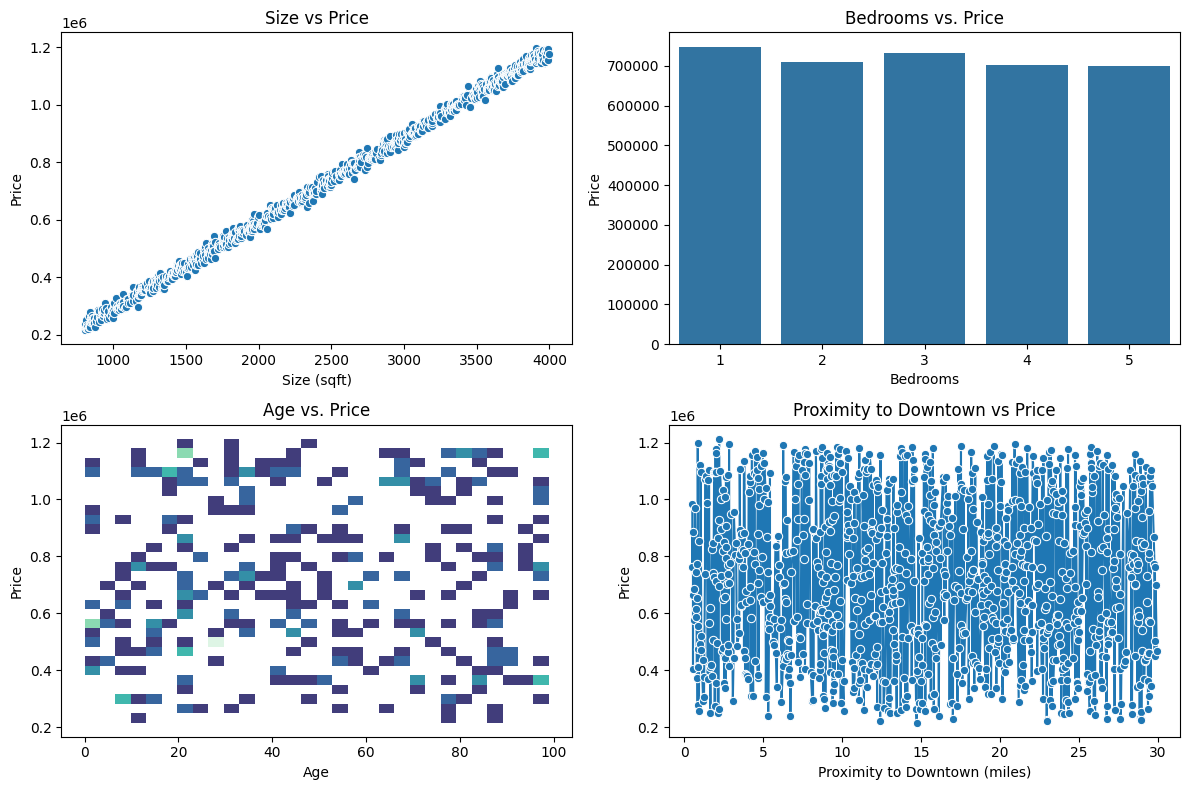

In [34]:
plt.figure(figsize=(12, 8))

# Line plot for Size vs Price
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Size (sqft)', y='Price', marker='o')
plt.title('Size vs Price')

# Bar plot for Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Bedrooms', y='Price', ci=None)
plt.title('Bedrooms vs. Price')

# Histogram for Age vs Price
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', y='Price', bins=30, pthresh=.05, cmap="mako")
plt.title('Age vs. Price')

# Line plot for Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Proximity to Downtown (miles)', y='Price', marker='o')
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

<ipython-input-35-e4cda4fbab0b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


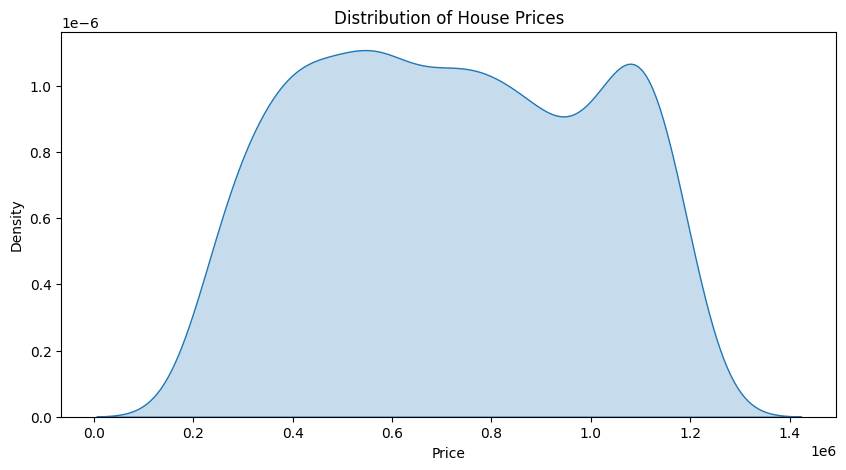

In [35]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'], shade=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


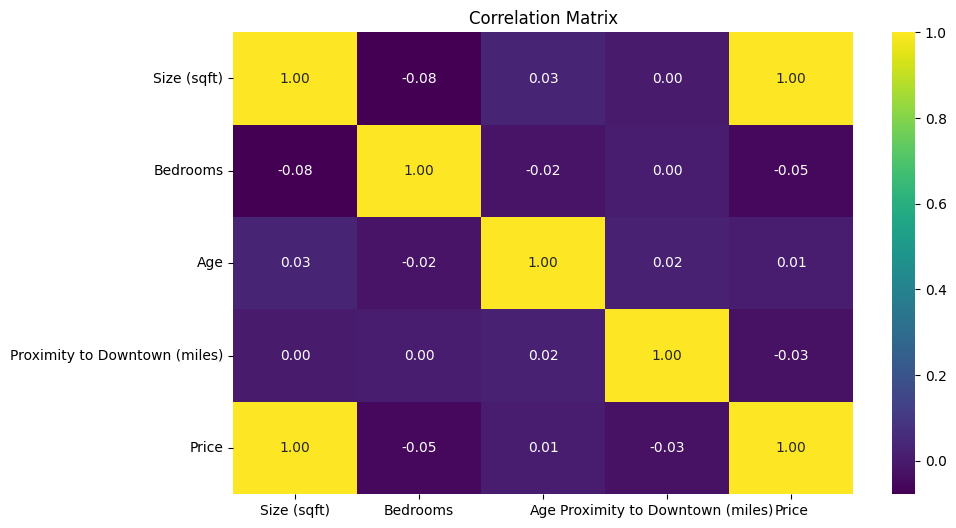

In [36]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

#2. Data Preprocessing



*   **Handling any Missing Data**



In [37]:
df.fillna(df.mean(), inplace=True)

print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')



*  **Normalizing or Standardizing the data**



In [38]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']


*  **Encode any categorical variables**



In [39]:
df.columns = df.columns.str.replace(' ', '')

#3. Model Development



*    **Multiple Regression Model Using Python**




In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()



*   **Train the Model on a Training Set**



In [41]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)



                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


#4. Model Evaluation



*   **Evaluate the model's performance using metrics such as Mean Squared Error (MSE), R-squared, and Adjusted R-squared.**




In [42]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00




*  **Provide a detailed interpretation of the model coefficients and their significance**


*   **Plot the predicted prices against the actual prices to visualize the model's accuracy**



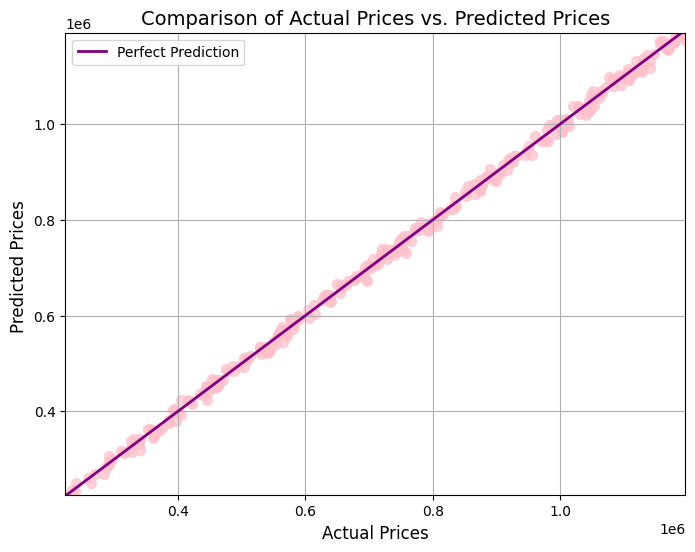

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o', s=50, alpha=0.7, color='pink')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linewidth=2, label='Perfect Prediction')
plt.xlim(min(y_test) - 10, max(y_test) + 10)
plt.ylim(min(y_pred) - 10, max(y_pred) + 10)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices ', fontsize=12)
plt.title('Comparison of Actual Prices vs. Predicted Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_prices.png', dpi=300)
plt.show()